In [1]:
# imports
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd

In [12]:
# writing a function to load all the data from .mat files
#def load_MEA_data():
# get a list of the file names
d = "data/raw/"
filenames = []

for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".mat"):
            filenames.append(os.path.join(root, file))

# initialise time vectors
t0 = {'time': np.arange(60001, 240001, 1)}
t1 = {'time': np.arange(420001, 600001, 1)}
t2 = {'time': np.arange(780001, 960001, 1)}

# set up dataframes to add the values into
# baseline (0), first drug administered (1), second drug administered (2)

df_baseline = pd.DataFrame(t0)
df_first = pd.DataFrame(t1)
df_second = pd.DataFrame(t2)

for file in filenames:
    matfile = loadmat(file)
    MEA_data = pd.DataFrame(matfile['filt_data'])
    MEA_mean = pd.DataFrame(MEA_data.mean(axis=0))

    # the name of the file will be the column header
    colname = os.path.split(file)[1]
    colname = colname[:-4]
    MEA_mean.columns = [colname]

    # concatenate appropriate dataframe
    if colname.endswith("0"):
        df_baseline = pd.concat([df_baseline, MEA_mean], axis=1)
    elif colname.endswith("1"):
        df_first = pd.concat([df_first, MEA_mean], axis=1)
    else:
        df_second = pd.concat([df_second, MEA_mean], axis=1)
# PUT THIS INTO A FUNCTION IN src/data/ 
# NEXT STEPS: EXPORT DATAFRAMES TO CSV IN data/interim

In [13]:
# trying to load one file's data in
ach_hex_baseline = loadmat("data/05_0201_ach-hex_0.mat")

# combine the MEA data into one data frame
data = pd.DataFrame(ach_hex_baseline['filt_data'])
data = data.T
time = pd.DataFrame(ach_hex_baseline['filt_t'])
time = time.T
time.columns = ['time']

df_ts = pd.concat([time, data], axis=1)
df_ts = df_ts.set_index('time')

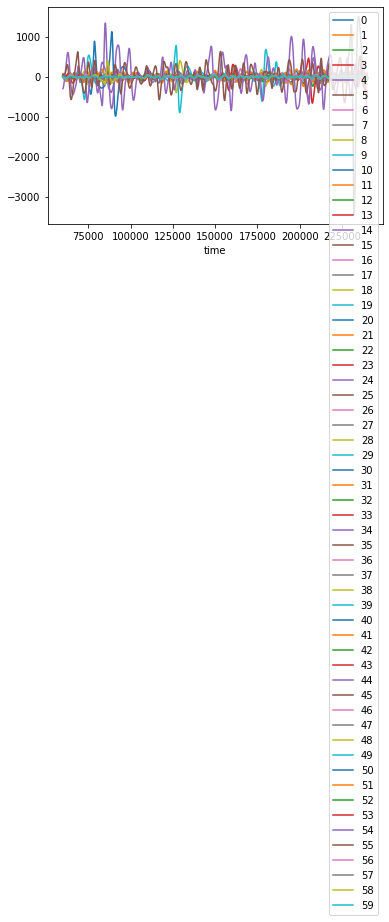

In [14]:
df_ts.plot()